In [86]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\Data\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [87]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [88]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [89]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) 

In [90]:
X = pd.DataFrame([im.histogram() for im in images])

In [91]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,255,38,40,37,49,35,54,55,79,68,...,18,7,7,4,7,10,4,6,3,58
1,3,0,3,4,3,3,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,4,5,8,19,16,11,...,13,9,12,9,15,17,12,24,11,46
4,0,0,0,0,0,0,0,2,0,3,...,8,5,13,10,7,11,18,16,15,50


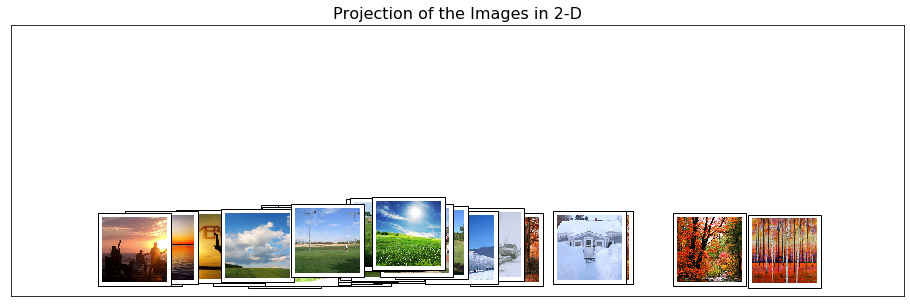

In [92]:
plot_image_space(images, X, title="Projection of the Images in 2-D")

### Part1 [25pts]:The PCA projection of the image color histograms in 2 dimensions.  Using the providedplotimagespace() function.  This should be displayed as thumbnail images distributedwithin a 2-dimensional plot.

In [93]:
from sklearn import decomposition

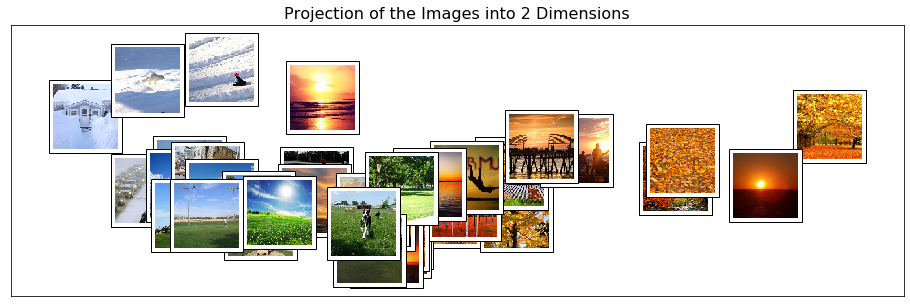

In [94]:
pca = decomposition.PCA(n_components = 2)
X_PCA = pca.fit_transform(X)
plot_image_space(images, X_pca)

### What does it mean for two images to be close together in this plot? What does it mean for two images to be far apart?

The images closer to each other have similar color scheme (similar RGB values). Hence we can see that the images belonging to same season appear closer to each other.

The images are far apart when they have different color scheme . They are likley to represent different seasons.

### Part3 [50pts]:Once you completed the first two parts of the assignment,  choose one of the following below:     1.  Repeat this process while using a different set of images curated by yourself.                                                            2.  Repeat this process using a different data reduction method and describe any sim-ilarities/differences between that experiment when compared to applying PCA

For this is have used 14 images of Bangalore (Courtesy : gettyimages)

In [95]:
img_sam_dir = os.path.join(os.getcwd(), "images_sam")
images_sam = load_images(img_sam_dir)

In [96]:
X_images_sam= pd.DataFrame([im.histogram() for im in images_sam])

In [97]:
X_images_sam.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,3,5,8,19,47,38,29,28,35,39,...,0,1,2,1,0,1,0,2,2,15
1,0,0,0,0,0,0,0,2,1,1,...,1,0,2,0,3,0,1,4,0,9
2,30,78,79,78,65,66,47,50,52,50,...,22,26,21,32,36,39,18,29,8,54
3,11,9,10,13,36,27,32,37,29,40,...,6,1,6,4,11,6,8,13,14,38
4,7,1,4,4,4,4,8,2,6,3,...,0,1,2,0,1,0,0,2,1,17


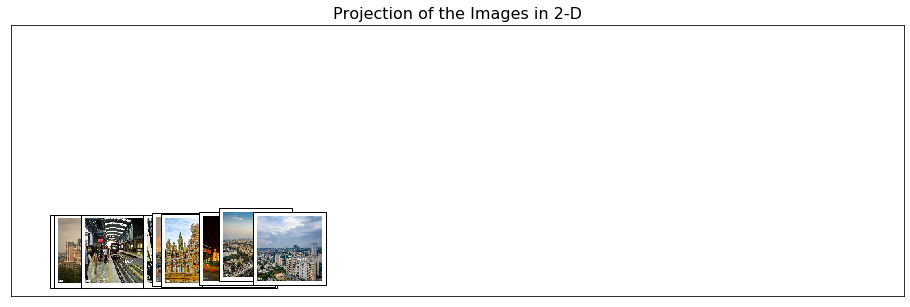

In [98]:
plot_image_space(images_sam, X_images_sam, title="Projection of the Images in 2-D")

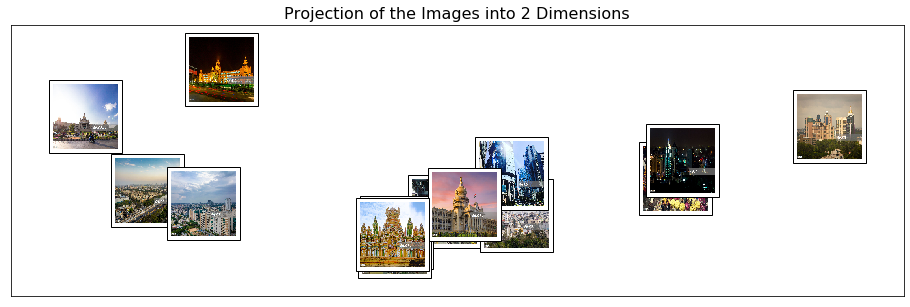

In [101]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
X_PCA = pca.fit_transform(X_images_sam)
plot_image_space(images_sam, X_pca)

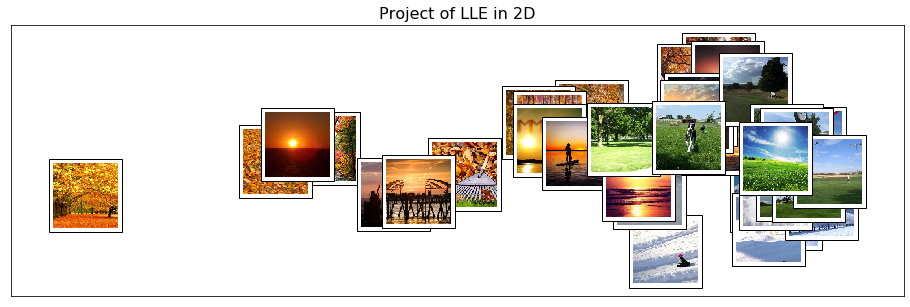

In [104]:
from sklearn import manifold
lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='standard')
X_lle = clf.fit_transform(X)

plot_image_space(images, X_lle,'Project of LLE in 2D')


I have used Locally Linear Embedding for the given set of images (https://cs.nyu.edu/~roweis/lle/papers /lleintroa4.pdf) The plot is quite different from the PCA one.